## Project 5 : Classification

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

### Problem 1: Load and understand the data (35 points)

In [2]:
# Step 1. Load the `titanic_data.csv` file into a pandas dataframe
a = pd.read_csv('titanic_data.csv')
a

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [3]:
# Step 2. Explore the data provided (e.g., looking at statistics using describe(), value_counts(), histograms, scatter plots of various features, etc.) 
a.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Text(0.5, 1.0, 'Parents/Children Aboard')

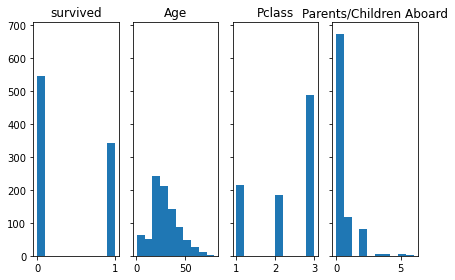

In [4]:
fig, axs = plt.subplots(1, 4, sharey=True, tight_layout=True)

# using tuple unpacking for multiple Axes
axs[0].hist(a['Survived'])
axs[0].set_title('survived')
axs[1].hist(a['Age'])
axs[1].set_title('Age')
axs[2].hist(a['Pclass'])
axs[2].set_title('Pclass')
axs[3].hist(a['Parents/Children Aboard'])
axs[3].set_title('Parents/Children Aboard')


Text(0, 0.5, 'number of passengers')

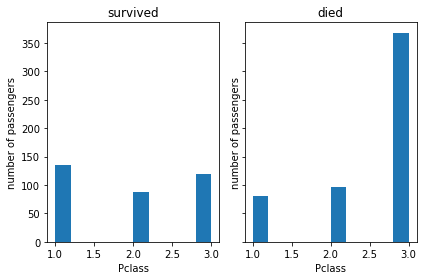

In [5]:
#Step 6. How did Pclass affect passenngers' chances of survival?
x = a[['Pclass','Survived']]
ar1 = []
ar2 = []
for i in range(len(x)):
    s = x.iloc[i]['Survived']
    c = x.iloc[i]['Pclass']
    if s:
        ar1.append(c)
    else:
        ar2.append(c)
        
        
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# using tuple unpacking for multiple Axes
axs[0].hist(ar1)
axs[0].set_title('survived')
axs[0].set_xlabel('Pclass')
axs[0].set_ylabel('number of passengers')
axs[1].hist(ar2)
axs[1].set_title('died')
axs[1].set_xlabel('Pclass')
axs[1].set_ylabel('number of passengers')
#y = [a[['Pclass','Survived']] if a[['Survived'] == 1]
#y
#Show your work with a bar plot, dataframe selection, or visual of your choice.


(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

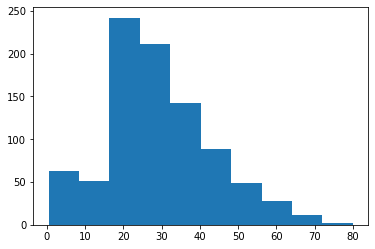

In [6]:
#Step 7. What is the age distribution of survivors?
plt.hist(a['Age'])

### Problem 2: transform the data (10 points)
The `Sex` column is categorical, meaning its data are separable into groups, but not numerical. To be able to work with this data, we need numbers, so you task is to transform the `Sex` column into numerical data with pandas' `get_dummies` feature and remove the original categorical `Sex` column.

In [7]:
b = pd.get_dummies(a, columns=['Sex'], drop_first=True)
b

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,Mr. Owen Harris Braund,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,0
2,1,3,Miss. Laina Heikkinen,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,0
4,0,3,Mr. William Henry Allen,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,27.0,0,0,13.0000,1
883,1,1,Miss. Margaret Edith Graham,19.0,0,0,30.0000,0
884,0,3,Miss. Catherine Helen Johnston,7.0,1,2,23.4500,0
885,1,1,Mr. Karl Howell Behr,26.0,0,0,30.0000,1


### Problem 3: Classification (30 points)
Now that the data is transformed, we want to run various classification experiments on it. The first is `K Nearest Neighbors`, which you will conduct by:

1. Define input and target data by creating lists of dataframe columns (e.g., inputs = ['Pclass', etc.)
2. Split the data into training and testing sets with `train_test_split()`
3. Create a `KNeighborsClassifier` using `5` neighbors at first (you can experiment with this parameter)
4. Train your model by passing the training dataset to `fit()`
5. Calculate predicted target values(y_hat) by passing the testing dataset to `predict()`
6. Print the accuracy of the model with `score()`

** Note: If you get a python warning as you use the Y, trainY, or testY vector in some of the function calls about "DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )", you can look up how to use trainY.values.ravel() or trainY.values.flatten() or another function, etc.

In [8]:
inputs = b[['Pclass', 'Sex_male', 'Parents/Children Aboard']]
targets = b['Survived']

trainx, testx, trainy, testy = train_test_split(inputs, targets, test_size = 0.5)

In [9]:
k = 5

model = neighbors.KNeighborsClassifier(k) 
model.fit(trainx, trainy)

KNeighborsClassifier()

In [10]:
model.predict(testx)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [11]:
model.score(testx, testy)

0.786036036036036

### Problem 4: Cross validation, classification report (15 points)
- Using the concepts from the 17-model_selection slides and the [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function from scikit-learn, estimate the f-score ([`f1-score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) (you can use however many folds you wish). To get `cross_val_score` to use `f1-score` rather than the default accuracy measure, you will need to set the `scoring` parameter and use a scorer object created via [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer).  Since this has a few parts to it, let me just give you that parameter: ```scorerVar = make_scorer(f1_score, pos_label=1)```

- Using the concepts from the end of the 14-classification slides, output a confusion matrix.

- Also, output a classification report [`classification_report`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from sklearn.metrics showing more of the metrics: precision, recall, f1-score for both of our classes.

In [12]:
scores = cross_val_score(model, inputs, targets, cv = 5, scoring = make_scorer(f1_score, pos_label=1)) 
scores

array([0.52631579, 0.74626866, 0.72611465, 0.68333333, 0.74418605])

In [13]:
conf_matrix = sk.metrics.confusion_matrix(testy, model.predict(testx))
report = sk.metrics.classification_report(testy, model.predict(testx))
print(conf_matrix)
print(report)

[[237  32]
 [ 63 112]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       269
           1       0.78      0.64      0.70       175

    accuracy                           0.79       444
   macro avg       0.78      0.76      0.77       444
weighted avg       0.79      0.79      0.78       444



### Problem 5: Support Vector Machines (15 points)
Now, repeat the above experiment using the using a Support Vector classifier [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with default parameters (RBF kernel) model in scikit-learn, and output:

- The fit accuracy (using the `score` method of the model)
- The f-score (using the [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function)
- The confusion matrix
- The precision, recall, and f-measure for the 1 class (you can just print the results of the [`classification_report`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function from sklearn.metrics)

In [14]:
model = svm.SVC(kernel='linear', C=10) 
#train our model
model.fit(trainx, trainy)
#evaluate the model 
model.score(testx, testy)
#setup to get f-score and cv
scores = cross_val_score(model, inputs, targets, cv = 5, scoring = make_scorer(f1_score, pos_label=1)) 
print(scores)
#confusion matrix
conf_matrix = sk.metrics.confusion_matrix(testy, model.predict(testx))
print(report)
#classification report
report = sk.metrics.classification_report(testy, model.predict(testx))
print(conf_matrix)

[0.74452555 0.74074074 0.71212121 0.64516129 0.703125  ]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       269
           1       0.78      0.64      0.70       175

    accuracy                           0.79       444
   macro avg       0.78      0.76      0.77       444
weighted avg       0.79      0.79      0.78       444

[[223  46]
 [ 54 121]]


### Problem 6: Logistic Regression (15 points)

Now, repeat the above experiment using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model in scikit-learn, and output:

- The fit accuracy (using the `score` method of the model)
- The f-score (using the [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function)
- The confusion matrix
- The precision, recall, and f-measure for the 1 class (you can just print the results of the [`classification_report`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function from sklearn.metrics)

In [15]:
model = linear_model.LogisticRegression()
#train our model
model.fit(trainx, trainy)
#evaluate the model 
model.score(testx, testy)
#setup to get f-score and cv
scores = cross_val_score(model, inputs, targets, cv = 5, scoring = make_scorer(f1_score, pos_label=1)) 
print(scores)
#confusion matrix
conf_matrix = sk.metrics.confusion_matrix(testy, model.predict(testx))
print(report)
#classification report
report = sk.metrics.classification_report(testy, model.predict(testx))
print(conf_matrix)


[0.74074074 0.74074074 0.71212121 0.64516129 0.704     ]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       269
           1       0.72      0.69      0.71       175

    accuracy                           0.77       444
   macro avg       0.76      0.76      0.76       444
weighted avg       0.77      0.77      0.77       444

[[223  46]
 [ 54 121]]


### Problem 7: Comparision and Discussion (5 points)
Edit this cell to provide a brief discussion (3-5 sentances at most):
1. What was the model/algorithm that performed best for you?

The Logistic Regression Model

2. What feaures and parameters were used to achieve that performance?

No Special Parameters, Using the features: 'Pclass', 'Sex_male', 'Parents/Children Aboard'

3. What insights did you gain from your experimentation about the predictive power of this dataset and did it match your original hypothesis about the relationship between given feature data and the target?

I learned that 'Pclass', 'Sex_male', and 'Parents/Children Aboard' were positively correlated with a passenger's chances of survival - with my best model correctly predicting with 80% accuracy, and having .81, .87, .84 precision, recall, and f1-score respectively. This shows that the dataset has significant predictive power when used in conjucntion with classification. 


### Questionnaire
1) How long did you spend on this assignment?

between 1:30 - 2:00

2) What did you like about it? What did you not like about it?

I liked trying different models for classification

3) Did you find any errors or is there anything you would like changed?

n/a